In [1]:
!pip install textdistance

In [2]:
import numpy as np
import pandas as pd
import textdistance
import re

# Open file

In [10]:
words = []
with open('/content/drive/MyDrive/4th year project/Keyboard Auto Suggestion NLP Project/autocorrect book.txt' ,'r', encoding='utf-8') as file:
  data = file.read()
  data = data.lower()
  words = re.findall('\w+', data)
  words +=words

In [12]:
print(words[:20])

['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of']


# Make Vocabulary

In [13]:
len(words)

445326

In [14]:
len(set(words))

17647

In [15]:
V = set(words)

In [16]:
from collections import Counter

In [18]:
word_freq_dict = Counter(words)

In [19]:
word_freq_dict.most_common(10)

[('the', 29406),
 ('of', 13484),
 ('and', 13034),
 ('a', 9598),
 ('to', 9414),
 ('in', 8476),
 ('that', 6162),
 ('it', 5068),
 ('his', 5060),
 ('i', 4240)]

# Relative Frequency of Words

## Probability (Word) = Frequency (word) / Total count of all words

In [20]:
total_words = sum(word_freq_dict.values())

probs = {}
for k in word_freq_dict.keys():
  probs[k] = word_freq_dict[k] / total_words

In [21]:
probs

{'the': 0.06603252448767868,
 'project': 0.0004086893646452262,
 'gutenberg': 0.0004221626404027611,
 'ebook': 4.4910919191783095e-05,
 'of': 0.030278941719100165,
 'moby': 0.0004041982727260479,
 'dick': 0.0004041982727260479,
 'or': 0.003579400259585113,
 'whale': 0.005524043060589321,
 'by': 0.005488114325235894,
 'herman': 1.796436767671324e-05,
 'melville': 1.796436767671324e-05,
 'this': 0.006462681271697588,
 'is': 0.007863901950481221,
 'for': 0.007383355115129142,
 'use': 0.0002200635040397372,
 'anyone': 2.694655151506986e-05,
 'anywhere': 7.185747070685296e-05,
 'at': 0.005995607712103043,
 'no': 0.002667708599991916,
 'cost': 1.796436767671324e-05,
 'and': 0.029268446037285047,
 'with': 0.00794474160502643,
 'almost': 0.000884745108078127,
 'restrictions': 8.98218383835662e-06,
 'whatsoever': 3.143764343424817e-05,
 'you': 0.004302466058572821,
 'may': 0.001145228439390469,
 'copy': 8.533074646438789e-05,
 'it': 0.011380426923197837,
 'give': 0.0004041982727260479,
 'away':

# Finding Similar Words

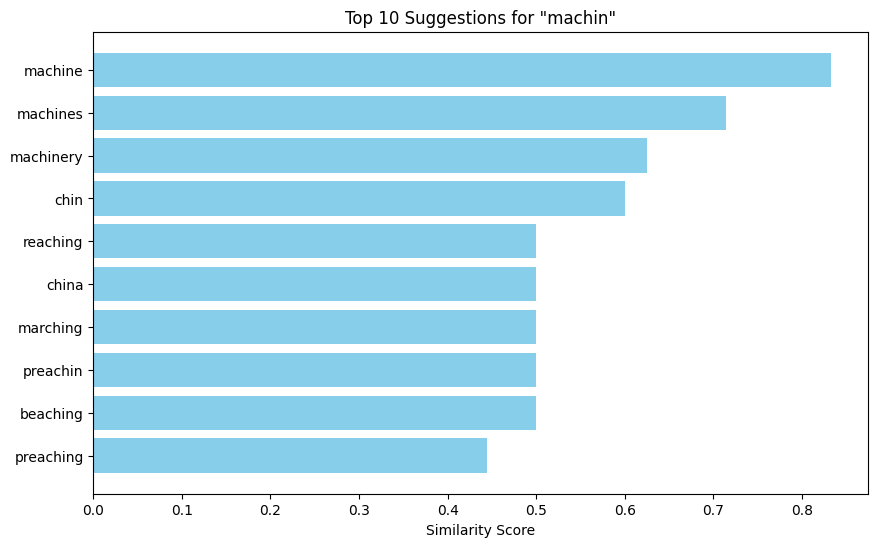

,word,prob,Similarity
16178,machine,0.000009,0.833333
17014,machines,0.000004,0.714286
7385,machinery,0.000004,0.625000
6259,chin,0.000022,0.600000
1983,reaching,0.000058,0.500000
1886,china,0.000040,0.500000
5847,marching,0.000027,0.500000
12934,preachin,0.000004,0.500000
14909,beaching,0.000004,0.500000
5005,preaching,0.000009,0.444444


In [28]:
import matplotlib.pyplot as plt

def autocorrect(word):
    word = word.lower()

    if word in probs:
        print('The word is already there:', word)
        return None
    else:
        similarities = [1 - (textdistance.Jaccard(qval=2)).distance(v, word) for v in word_freq_dict.keys()]
        df = pd.DataFrame({'word': list(probs.keys()), 'prob': list(probs.values())})
        df['Similarity'] = similarities

        output = df.sort_values(['Similarity', 'prob'], ascending=False).head(10)

        # Plotting the graph
        plt.figure(figsize=(10, 6))
        plt.barh(output['word'], output['Similarity'], color='skyblue')
        plt.xlabel('Similarity Score')
        plt.title(f'Top 10 Suggestions for "{word}"')
        plt.gca().invert_yaxis()
        plt.show()
        return output
autocorrect('machin')